In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
project_dir = r"D:\Pycharm_Projects\xgboost_loan_data"
data_dir = os.path.join(project_dir,'data')
output_dir = os.path.join(project_dir,'output','data_exploration')

In [3]:
df = pd.read_csv(os.path.join(data_dir,'loan_data.csv'))

In [12]:
cat_col_names = df.select_dtypes(exclude=np.number).columns.tolist()
num_col_names = df.select_dtypes(include=np.number).columns.tolist()

In [15]:
num_col_names.remove('loan_status')

## Normalize the numerical columns to be used in the models

In [16]:
num_col_names

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [17]:

scaler = StandardScaler().set_output(transform="pandas")

scaled_data = scaler.fit_transform(df.loc[:,num_col_names])

In [21]:
df.loc[:,num_col_names].describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000


In [20]:
scaled_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04
mean,-1.191343e-16,-4.294836e-17,1.073709e-17,1.263187e-17,-2.779012e-16,-9.094947e-17,1.957940e-17,-9.627065e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.284388e+00,-8.992491e-01,-8.922841e-01,-1.438388e+00,-1.875471e+00,-1.602141e+00,-9.968632e-01,-4.810296e+00
25%,-6.226885e-01,-4.117681e-01,-7.273619e-01,-7.257784e-01,-8.112750e-01,-7.994934e-01,-7.391085e-01,-6.267188e-01
50%,-2.918388e-01,-1.650185e-01,-2.325953e-01,-2.507052e-01,1.139469e-03,-2.261734e-01,-4.813539e-01,1.465490e-01
75%,3.698606e-01,1.923637e-01,4.270935e-01,4.202961e-01,6.658422e-01,5.764745e-01,5.496646e-01,7.413704e-01
max,1.922829e+01,8.853898e+01,1.972299e+01,4.024953e+00,3.019158e+00,5.965682e+00,6.220266e+00,4.310299e+00


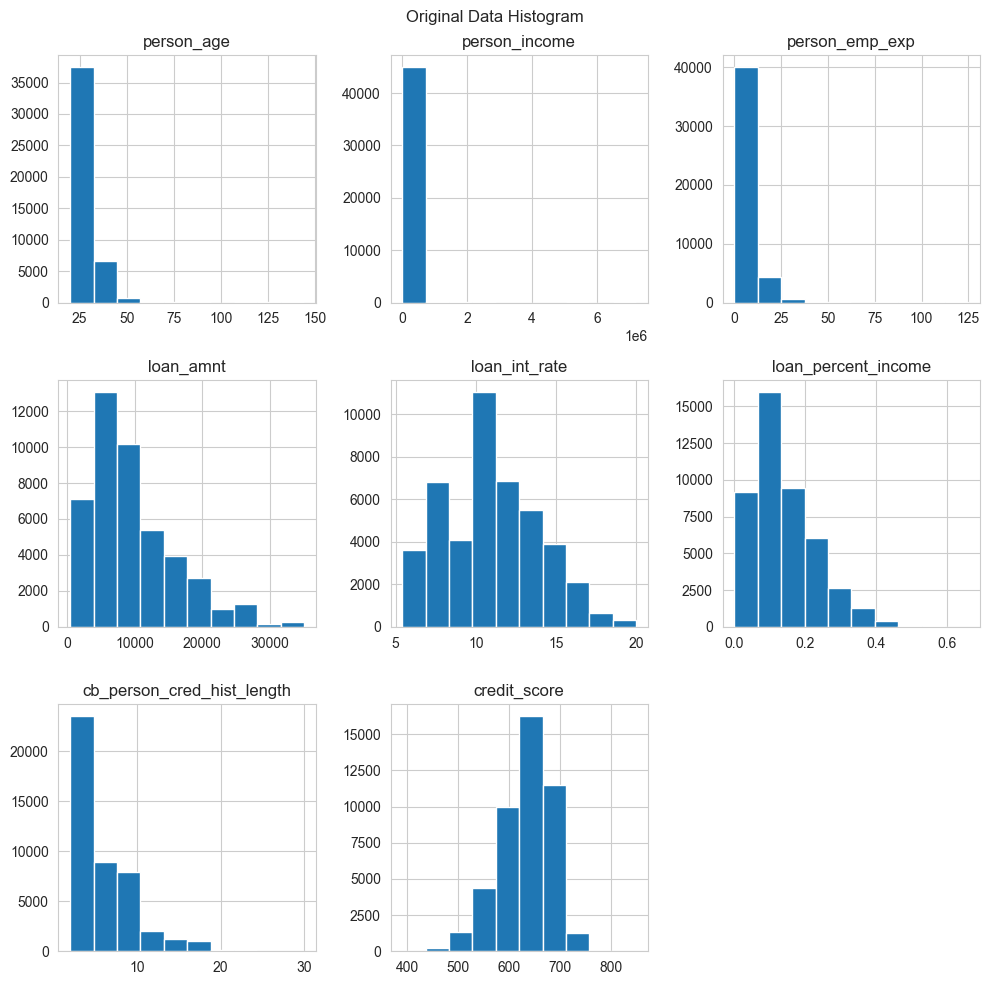

In [33]:
df.loc[:,num_col_names].hist(figsize=(10,10))
plt.suptitle('Original Data Histogram')
plt.tight_layout()
plt.show()

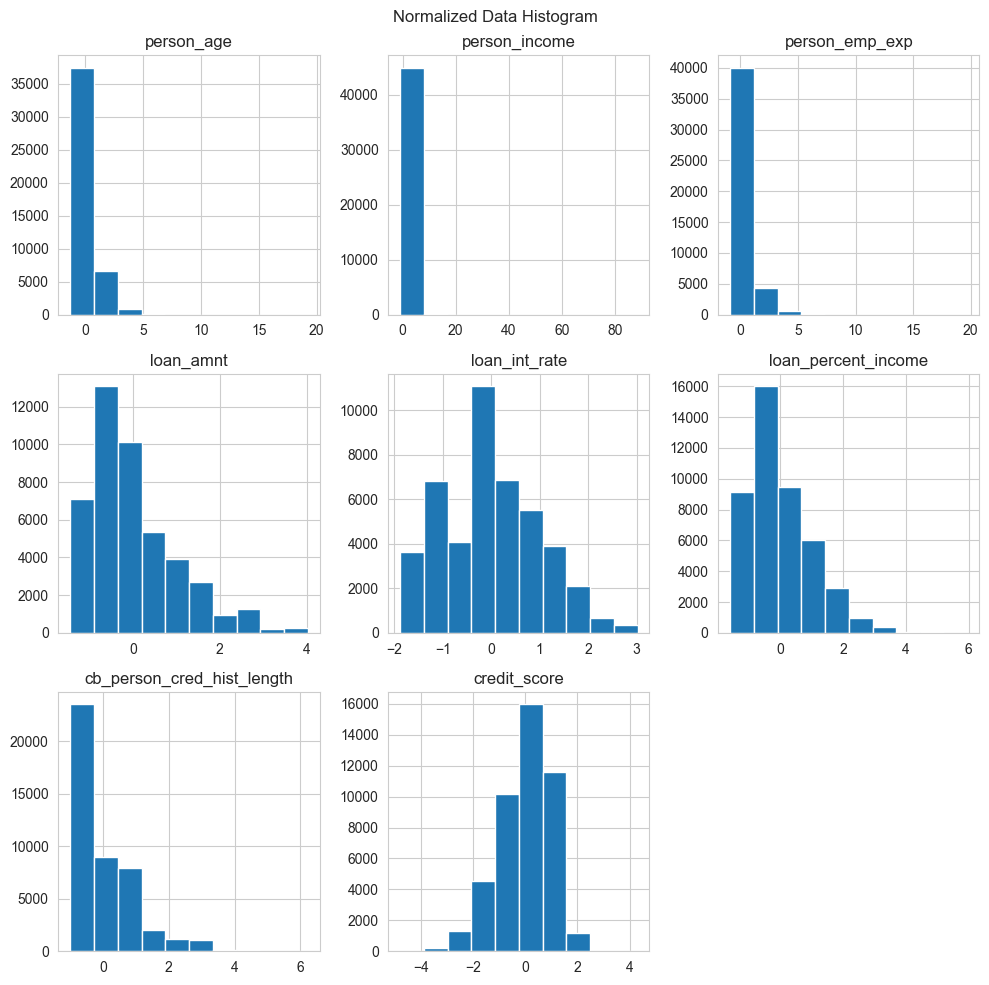

In [34]:
scaled_data.hist(figsize=(10,10))
plt.suptitle('Normalized Data Histogram')
plt.tight_layout()
plt.show()

In [41]:
normalized_data = pd.concat([df.loc[:,cat_col_names],scaled_data,df.loc[:,['loan_status']]],axis=1)
normalized_data = normalized_data.loc[:,df.columns]

In [44]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [43]:
normalized_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,female,Master,-0.104090,-0.892284,RENT,4.024953,PERSONAL,1.683039,4.016394,-0.739109,-1.419814,No,1
1,-1.118963,female,High School,-0.846005,-0.892284,OWN,-1.359209,EDUCATION,0.044782,-0.684829,-0.996863,-2.549975,Yes,0
2,-0.457264,female,High School,-0.844065,-0.397517,MORTGAGE,-0.646600,MEDICAL,0.625557,3.443074,-0.739109,0.047412,No,1
3,-0.788113,female,Bachelor,-0.007039,-0.892284,RENT,4.024953,MEDICAL,1.417829,3.443074,-0.996863,0.840507,No,1
4,-0.622689,male,Master,-0.176371,-0.727362,RENT,4.024953,MEDICAL,1.095549,4.475050,-0.481354,-0.924130,No,1


In [45]:
print(f"Original Shape: {df.shape}, Normalized data Shape: {normalized_data.shape}")

Original Shape: (45000, 14), Normalized data Shape: (45000, 14)


In [47]:
normalized_data.to_csv(os.path.join(data_dir,'loan_data_normalized.csv'),index=False)